In [1]:
from IPython.display import display, clear_output
import os

if "notebooks" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))

import lib.utils
from lib.utils import plots
from lib.models_help.runner import test_models

import random
random.seed(42)

import warnings
warnings.filterwarnings("ignore")

questoes = lib.utils.load_json("./data/questoes/questoes.json")

In [2]:
# Realizamos uma filtragem nas questões para obtermos apenas as questões com apenas texto
text_questions   = list(filter(lambda x : x["type"] == "only-text", questoes))

# Agora seelcionamos de forma pseudo-aleatória as 100 questões, sendo 25 de cada disciplina
example_text_questions  = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", text_questions)), 25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", text_questions)),25))
)

,Model,Size,Finish,OK,Null,Tout,Err,Acc,Prec,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,gemma3:12b,None,100 (25.0%),69,1,0,30,0.69,0.696970,07:00,07:00,0.00,4.21,9.25,3.91
1,gemma3,None,100 (25.0%),57,0,0,43,0.57,0.570000,06:30,06:30,0.00,3.91,6.50,3.61
2,phi4-mini,None,100 (25.0%),55,0,0,45,0.55,0.550000,06:37,06:37,0.00,3.97,8.97,3.39
3,gemma3:1b,None,100 (25.0%),23,0,0,77,0.23,0.230000,06:49,06:49,0.00,4.10,21.38,3.63
4,TOTAL,0,400 (25.0%),204,1,0,195,0.51,0.511278,26:58,26:58,0.00,4.05,21.38,3.39


TypeError: float() argument must be a string or a real number, not 'NoneType'

Error in callback <function _draw_all_if_interactive at 0x0000023BCA27AE80> (for post_execute), with arguments args (),kwargs {}:


TypeError: float() argument must be a string or a real number, not 'NoneType'

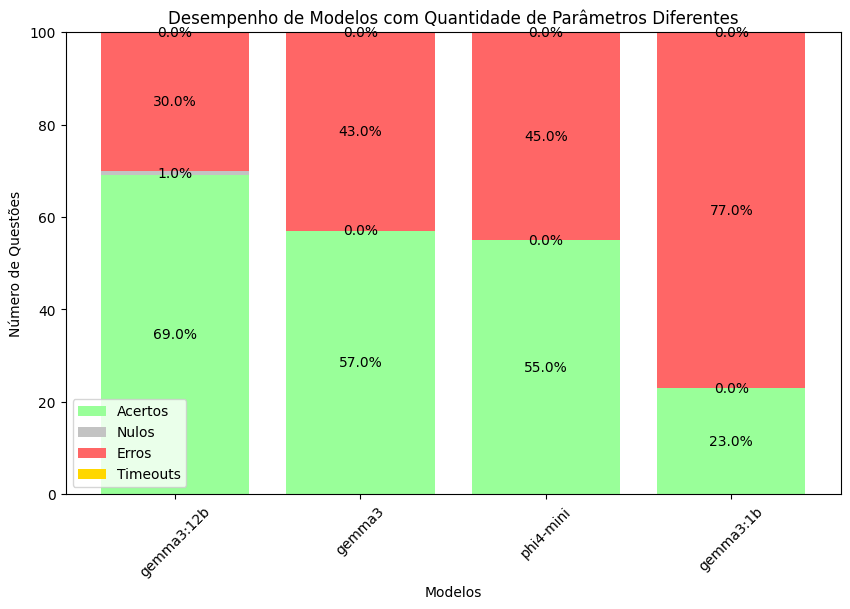

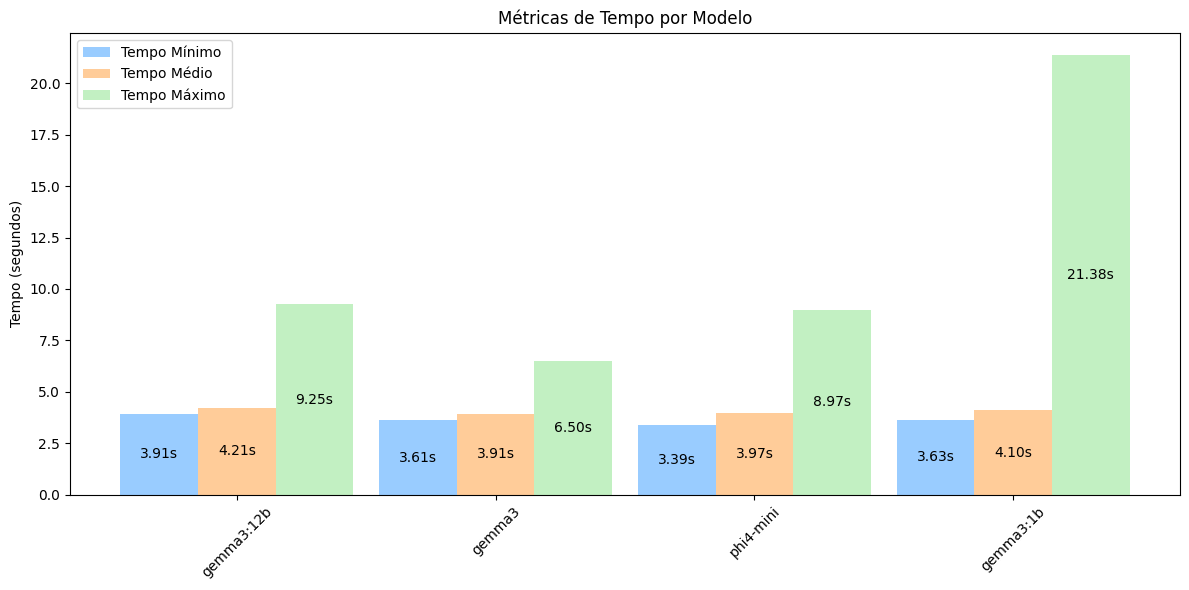

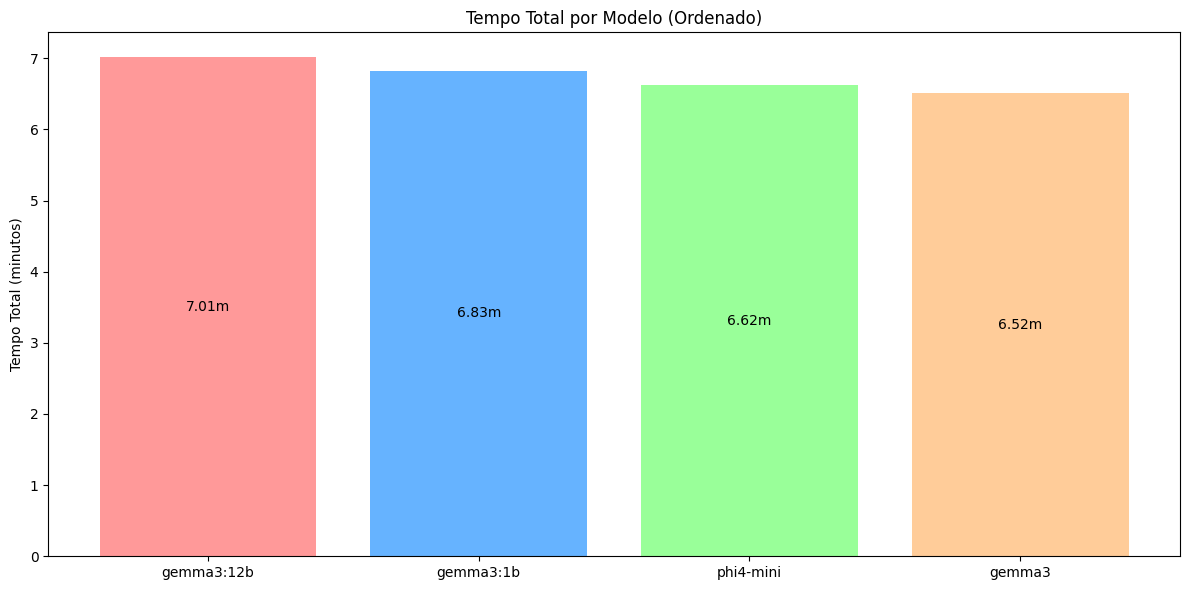

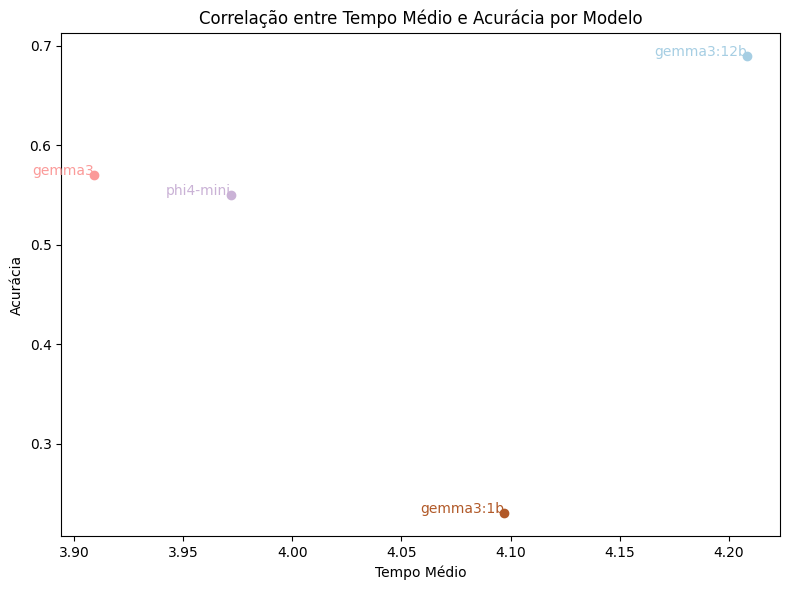

TypeError: float() argument must be a string or a real number, not 'NoneType'

<Figure size 800x600 with 1 Axes>

In [3]:
news_models = [ "gemma3:1b", "gemma3","gemma3:12b", "phi4-mini"]

test_result = test_models(
    primary_models=news_models,
    questions=example_text_questions
)

qwen_table = lib.utils.test_table(
    questions=example_text_questions,
    models=news_models
)

clear_output(wait=True)
display(lib.utils.format_test_table(qwen_table))
plots.model_performance(qwen_table, "Desempenho de Modelos com Quantidade de Parâmetros Diferentes")
plots.time_metrics(qwen_table)
plots.time_metrics_total(qwen_table)
plots.correlation(qwen_table)
plots.correlation(qwen_table, "Size")
plots.discipline_performance(news_models, example_text_questions, True, False)
None

In [ ]:
gemma2_models = ["gemma2:2b", "gemma2", "gemma2:27b"]
gemma3_models = ["gemma3:1b", "gemma3", "gemma3:12b"] 

all_gemma = gemma2_models + gemma3_models

qwen_table = lib.utils.test_table(
    questions=example_text_questions,
    models=all_gemma
)


In [ ]:
qwen_table

,Model,Size,Finish,OK,Null,Tout,Err,Acc,Prec,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,gemma2:27b,16.0,100,69,1,0,30,0.690000,0.696970,728.848389,728.848389,0.0,7.288484,80.914274,5.779446
1,gemma3:12b,NaN,100,69,1,0,30,0.690000,0.696970,420.848664,420.848664,0.0,4.208487,9.248113,3.910595
2,gemma2,5.4,100,68,1,0,31,0.680000,0.686869,58.630109,58.630109,0.0,0.586301,8.829850,0.283120
3,gemma2:2b,1.6,100,58,0,0,42,0.580000,0.580000,392.977864,392.977864,0.0,3.929779,6.441724,3.585298
4,gemma3,NaN,100,57,0,0,43,0.570000,0.570000,390.913712,390.913712,0.0,3.909137,6.502528,3.610200
5,gemma3:1b,NaN,100,23,0,0,77,0.230000,0.230000,409.697611,409.697611,0.0,4.096976,21.379750,3.629807
6,TOTAL,23.0,600,344,3,0,253,0.573333,0.576214,2401.916350,2401.916350,0.0,4.003194,80.914274,0.283120
